# Téléchargement de la structure de bande de phonons du matériau 

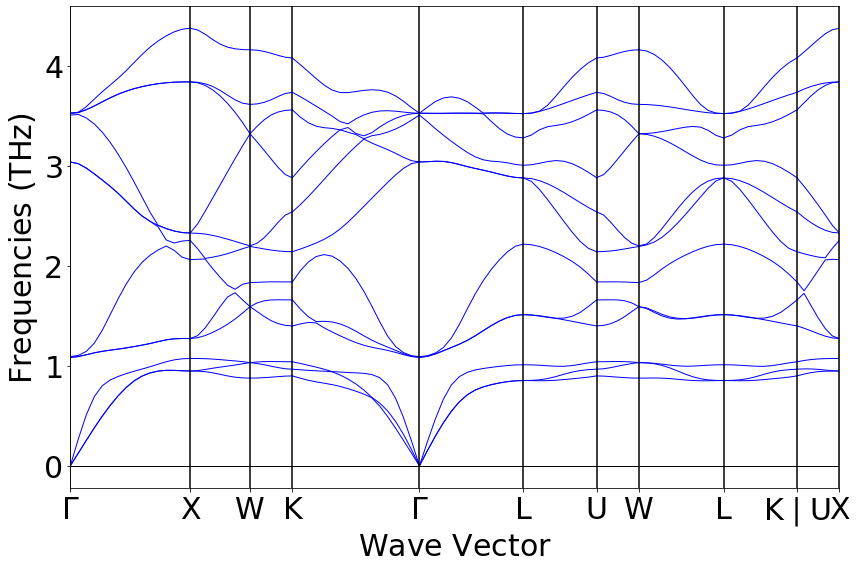

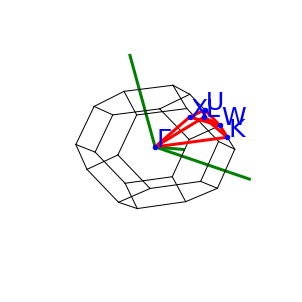

In [38]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.phonon import plotter
from pymatgen.phonon.plotter import PhononBSPlotter
from pymatgen.phonon import bandstructure
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

with MPRester("AchX5nmEpJI03g7B") as m:
    
    #Téléchargement de la structure de bandes
    struct = m.get_structure_by_material_id("mp-867193") 
    phostruct = m.get_phonon_bandstructure_by_material_id("mp-867193") 
    psplot = PhononBSPlotter(phostruct)
    psplot.get_plot()
    
    #Zone de Brillouin
    psplot.plot_brillouin()
    

# Calcul de la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin         


Pour déterminer les branches acoustiques, il faut trouver les bandes dont la fréquence du phonon est nulle au centre de la zone de Brillouin. Dans notre cas, il y a trois directions possibles pour ces branches acoustiques : les direction : Γ-X, K-Γ et Γ-L

La vitesse du son est donnée par $v = ω / |q| = 2πf/ |q|$ où ω est la fréquence angulaire, f la fréquence et |q| est le module du vecteur d'onde.

Pour calculer la vitesse du son le long de chaque branche acoustique, il faut déterminer la pente de la tangente à cette branche selon la direction choisie, pour une fréquence nulle. C'est cette pente qui correspond à la vitesse du son le long de cette branche acoustique.

In [36]:
# Détermination des 3 branches

data = psplot.bs_plot_data()

distances = data['distances']
frequency = data['frequency']
directions = data['ticks']['label']

def find_acoustic_branches(frequencies,frequence,branche,zone):
    for i in range(len(frequencies)):
        for j in range(len(frequencies[i])):
            if frequencies[i][j][0] == 0 and j not in branche and i not in zone:
                zone.append(i)
                branche.append(j)
                frequence.append(frequencies[i][j])
            elif frequencies[i][j][-1] == 0 and j not in branche and i not in zone:
                zone.append(i)
                branche.append(j)
                frequence.append(frequencies[i][j])
        if len(branche) == 3:
            break
    return(frequence,branche,zone)

find_acoustic_branches(frequency,[],[],[])
print("Branches acoustiques :", find_acoustic_branches(frequency,[],[],[])[1])
print("Zones correspondantes :", find_acoustic_branches(frequency,[],[],[])[2])
print("Ceci correspond aux bandes Γ-X, K-Γ et Γ-L")

#Distances (correspondent au q de la formule de la vitesse)

q1 = distances[find_acoustic_branches(frequency,[],[],[])[2][0]]
q2 = distances[find_acoustic_branches(frequency,[],[],[])[2][1]]
q3 = distances[find_acoustic_branches(frequency,[],[],[])[2][2]]

#Frequences associées

f1 = frequency[find_acoustic_branches(frequency,[],[],[])[2][0]][find_acoustic_branches(frequency,[],[],[])[1][0]]
f2 = frequency[find_acoustic_branches(frequency,[],[],[])[2][1]][find_acoustic_branches(frequency,[],[],[])[1][1]]
f3 = frequency[find_acoustic_branches(frequency,[],[],[])[2][2]][find_acoustic_branches(frequency,[],[],[])[1][2]]

Branches acoustiques : [0, 1, 2]
Zones correspondantes : [0, 3, 4]
Ceci correspond aux bandes Γ-X, K-Γ et Γ-L


In [37]:
#Calcul des pentes

def pente(q,f):
    coef = []
    absc =[]
    tan = []
    if (q == q1 or q == q3):
        x = np.array([q[0],q[1]])
        y = np.array([f[0],f[1]])
    elif (q == q2):
        x = np.array([q[-1],q[-2]])
        y = np.array([f[-1],f[-2]])

    coef = np.polyfit(x,y,1)
    absc = np.linspace(q[0],q[-1],100)
    tan = coef[0] * absc + coef[1]

    return(coef,absc,tan)

pente1 = pente(q1,f1)
pente2 = pente(q2,f2)
pente3 = pente(q3,f3)

def vson(coef):
    return abs(2*math.pi*coef*100) #correction

print("La vitesse du son de la première branche acoustique dans la direction Γ - X vaut ", vson(pente1[0][0]), " [m/s]")
print("La vitesse du son de la deuxième branche acoustique dans la direction K - Γ vaut ", vson(pente2[0][0]), " [m/s]")
print("La vitesse du son de la troisième branche acoustique dans la direction Γ - L vaut ", vson(pente3[0][0]), " [m/s]")

La vitesse du son de la première branche acoustique dans la direction Γ - X vaut  1498.566275613888  [m/s]
La vitesse du son de la deuxième branche acoustique dans la direction K - Γ vaut  1923.9746548131923  [m/s]
La vitesse du son de la troisième branche acoustique dans la direction Γ - L vaut  2853.8458925850264  [m/s]


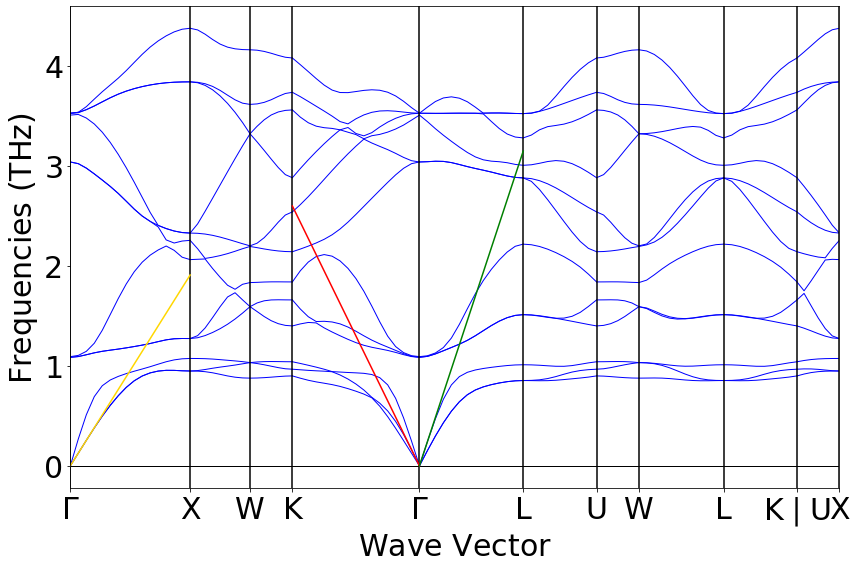

In [42]:
#Affichage tangentes

psplot.get_plot()
plt.plot(pente1[1], pente1[2], color = "gold")
plt.plot(pente2[1], pente2[2], color = "red")
plt.plot(pente3[1], pente3[2], color = "green")
plt.show()